This notebook implements gradient descent and stochastic gradient descent algorithm with a linear regression problem

# Importing Libraries

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import seaborn as sns
import random

# Generating data points 

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=20,random_state=42)
x = x[:,0]

Text(0, 0.5, 'Variable Y')

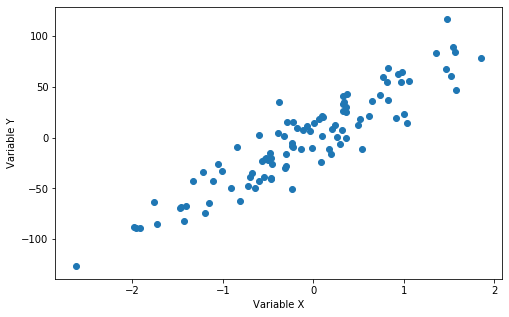

In [3]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(x,y)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

#fig.savefig("linear_plot.png")

# Defining gradient descent and stochastic gradient descent function

In [4]:
def define_prediction_function(x,alpha,beta):
    
    return alpha*x + beta

In [5]:
def define_loss_function(x,y,alpha,beta,prediction_function):
    m = len(y)
    
    return (1/2*m)*np.sum((y-prediction_function(x,alpha,beta))**2)

In [6]:
def compute_gradient_descent(alpha,beta,x,y,learning_rate,loss_function):
    
    m = len(y)
    
    alpha_derivative = (1/m)*np.sum(x*((alpha*x+beta)-y))
    beta_derivative = (1/m)*np.sum((alpha*x+beta)-y)
    
    alpha = alpha - alpha_derivative*learning_rate
    beta = beta - beta_derivative*learning_rate
    
    return alpha,beta

In [7]:
def compute_stochastic_gradient_descent(alpha,beta,x,y,learning_rate,loss_function):
    
    
    index,x_value = random.choice(list(enumerate(x)))
    y_value = y[index]
        
    alpha_derivative = x_value*((alpha*x_value+beta)-y_value)
    beta_derivative = (alpha*x_value+beta)-y_value
    
    alpha = alpha - alpha_derivative*learning_rate
    beta = beta - beta_derivative*learning_rate
    

    
    return alpha,beta

In [8]:
prediction_function = define_prediction_function
loss_function = define_loss_function

In [9]:
alpha_grid = beta_grid = np.linspace(-200, 200, 100)
grid_alpha, grid_beta = np.meshgrid(alpha_grid, beta_grid)

# Compute Gradient Descent

In [10]:
alpha = 200
beta = -200
learning_rate = 0.01
epsilon = 0.1
loss_prev = 0

list_point = []
while epsilon >= 0.01:
    alpha,beta = compute_gradient_descent(alpha,beta,x,y,learning_rate,loss_function)
    loss = loss_function(x,y,alpha,beta,prediction_function)
    epsilon = np.abs(loss - loss_prev)
    loss_prev = loss 
    list_point.append((alpha,beta))

    

# Compute Stochastic Gradient Descent 

In [12]:
alpha = 200
beta = -200
learning_rate = 0.01
epsilon = 0.1
loss_prev = 0

list_point_stochastic = []
while epsilon >= 0.01:
    alpha,beta = compute_stochastic_gradient_descent(alpha,beta,x,y,learning_rate,loss_function)
    loss = loss_function(x,y,alpha,beta,prediction_function)
    epsilon = np.abs(loss - loss_prev)
    loss_prev = loss 
    list_point_stochastic.append((alpha,beta))

    

# Visualizing Mean squared error

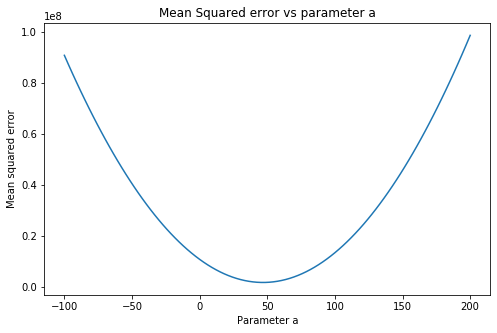

In [13]:
alpha_list = np.linspace(-100,200,100)

loss_2d = []
for alpha_param in alpha_list:
    loss_2d.append(loss_function(x,y,alpha_param,0,prediction_function))

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(alpha_list,loss_2d)
plt.title("Mean Squared error vs parameter a")
plt.xlabel("Parameter a")
plt.ylabel("Mean squared error")
fig.savefig("mse.png")


# Visualizing linear regression

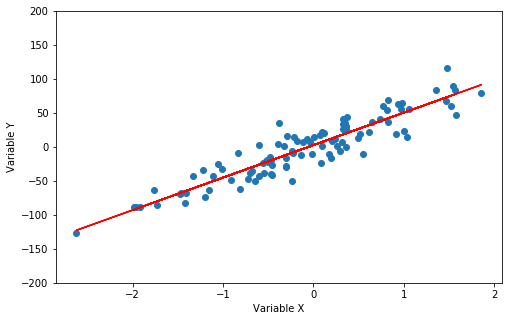

In [14]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_ylim([-200,200])
ax1.scatter(x,y)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

#fig.savefig("linear_plot.png")
plt.plot(x,prediction_function(x,alpha,beta),color="r")

# Stochastic Gradient Descent 3D animation

In [15]:
list_test = list_point[::10]
list_test_stochastic = list_point_stochastic[::10]

In [16]:
grid_z = []

for beta in beta_grid:
    row_list = []
    for alpha in alpha_grid:
        row_list.append(loss_function(x,y,alpha,beta,prediction_function))
    grid_z.append(row_list)

In [17]:
x_data = []
y_data = []
z_data = []
z_data_2d = []
for alpha,beta in list_test:
    x_data.append(alpha)
    y_data.append(beta)
    z_data.append(loss_function(x,y,alpha,beta,prediction_function))
    z_data_2d.append(loss_function(x,y,alpha,0,prediction_function))
    

x_data_stochastic = []
y_data_stochastic = []
z_data_stochastic = []

for alpha,beta in list_test_stochastic:
    x_data_stochastic.append(alpha)
    y_data_stochastic.append(beta)
    z_data_stochastic.append(loss_function(x,y,alpha,beta,prediction_function))
    

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


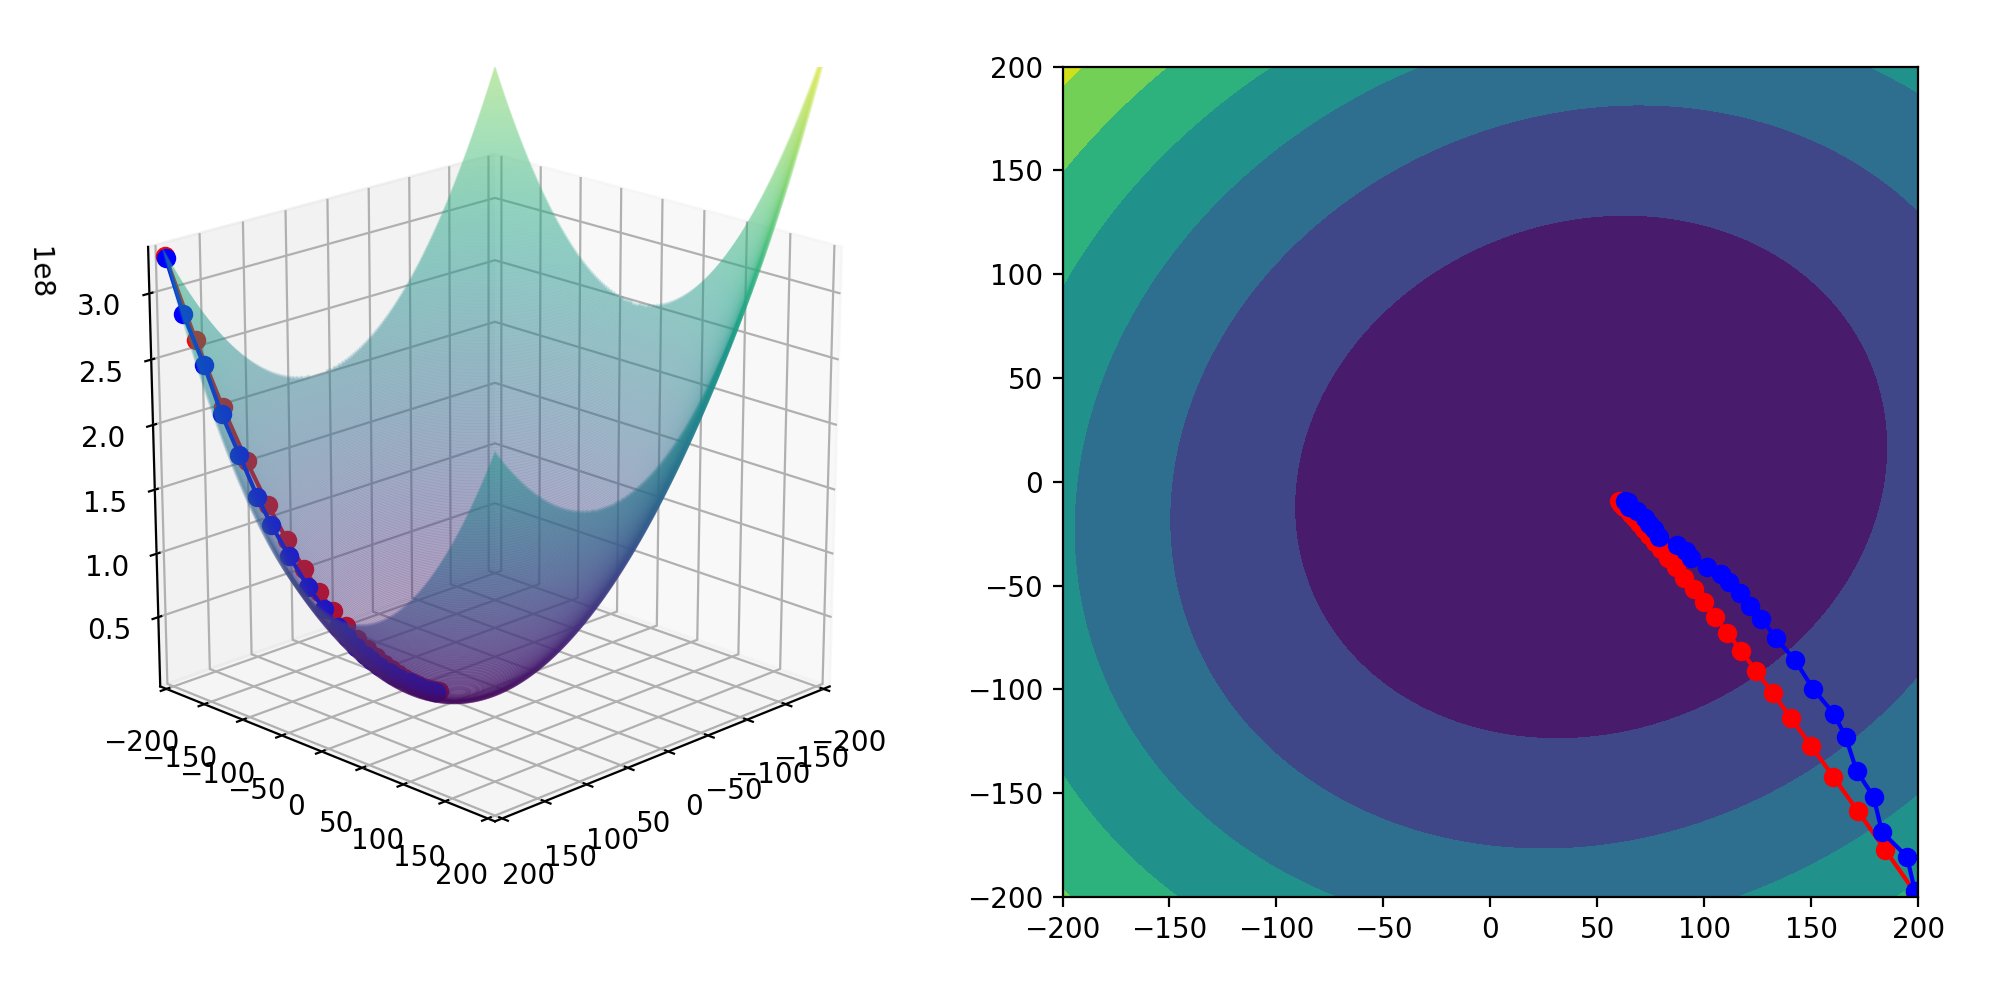

/Users/baptiste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'color'
  import sys


In [19]:
data = np.array([[x_data,y_data,z_data]])
data_stochastic = np.array([[x_data_stochastic,y_data_stochastic,z_data_stochastic]])

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.contour3D(grid_alpha, grid_beta, grid_z, 500, color="red",alpha=0.2)
ax1.view_init(elev=20., azim=45)
lines = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="red")[0] for dat in data]
lines_stochastic = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="blue")[0] for dat in data_stochastic]

ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])
ax1.set_zlim([min(z_data),max(z_data)])

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

cp = ax2.contourf(alpha_grid,beta_grid,grid_z, cmap='viridis')
line2, = ax2.plot([],[],color='red',marker="o")
line3, = ax2.plot([],[],color='blue',marker="o")


def update_lines(num, dataLines, data_stochastic, lines,lines_stochastic,line2,line3):
    
    line2.set_data(x_data[0:num], y_data[0:num])
    line3.set_data(x_data_stochastic[0:num], y_data_stochastic[0:num])
    
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
        
    for line, data in zip(lines_stochastic, data_stochastic):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
    
    
        
    return lines,lines_stochastic,line2,line3


line_ani = animation.FuncAnimation(fig, update_lines, fargs=(data,data_stochastic,lines,lines_stochastic,line2,line3),
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('stochastic_gradient_descent.gif', writer="PillowWriter")
#fig.savefig('last_frame.png', writer="PillowWriter")

# Gradient Descent 2D animation

<IPython.core.display.Javascript object>


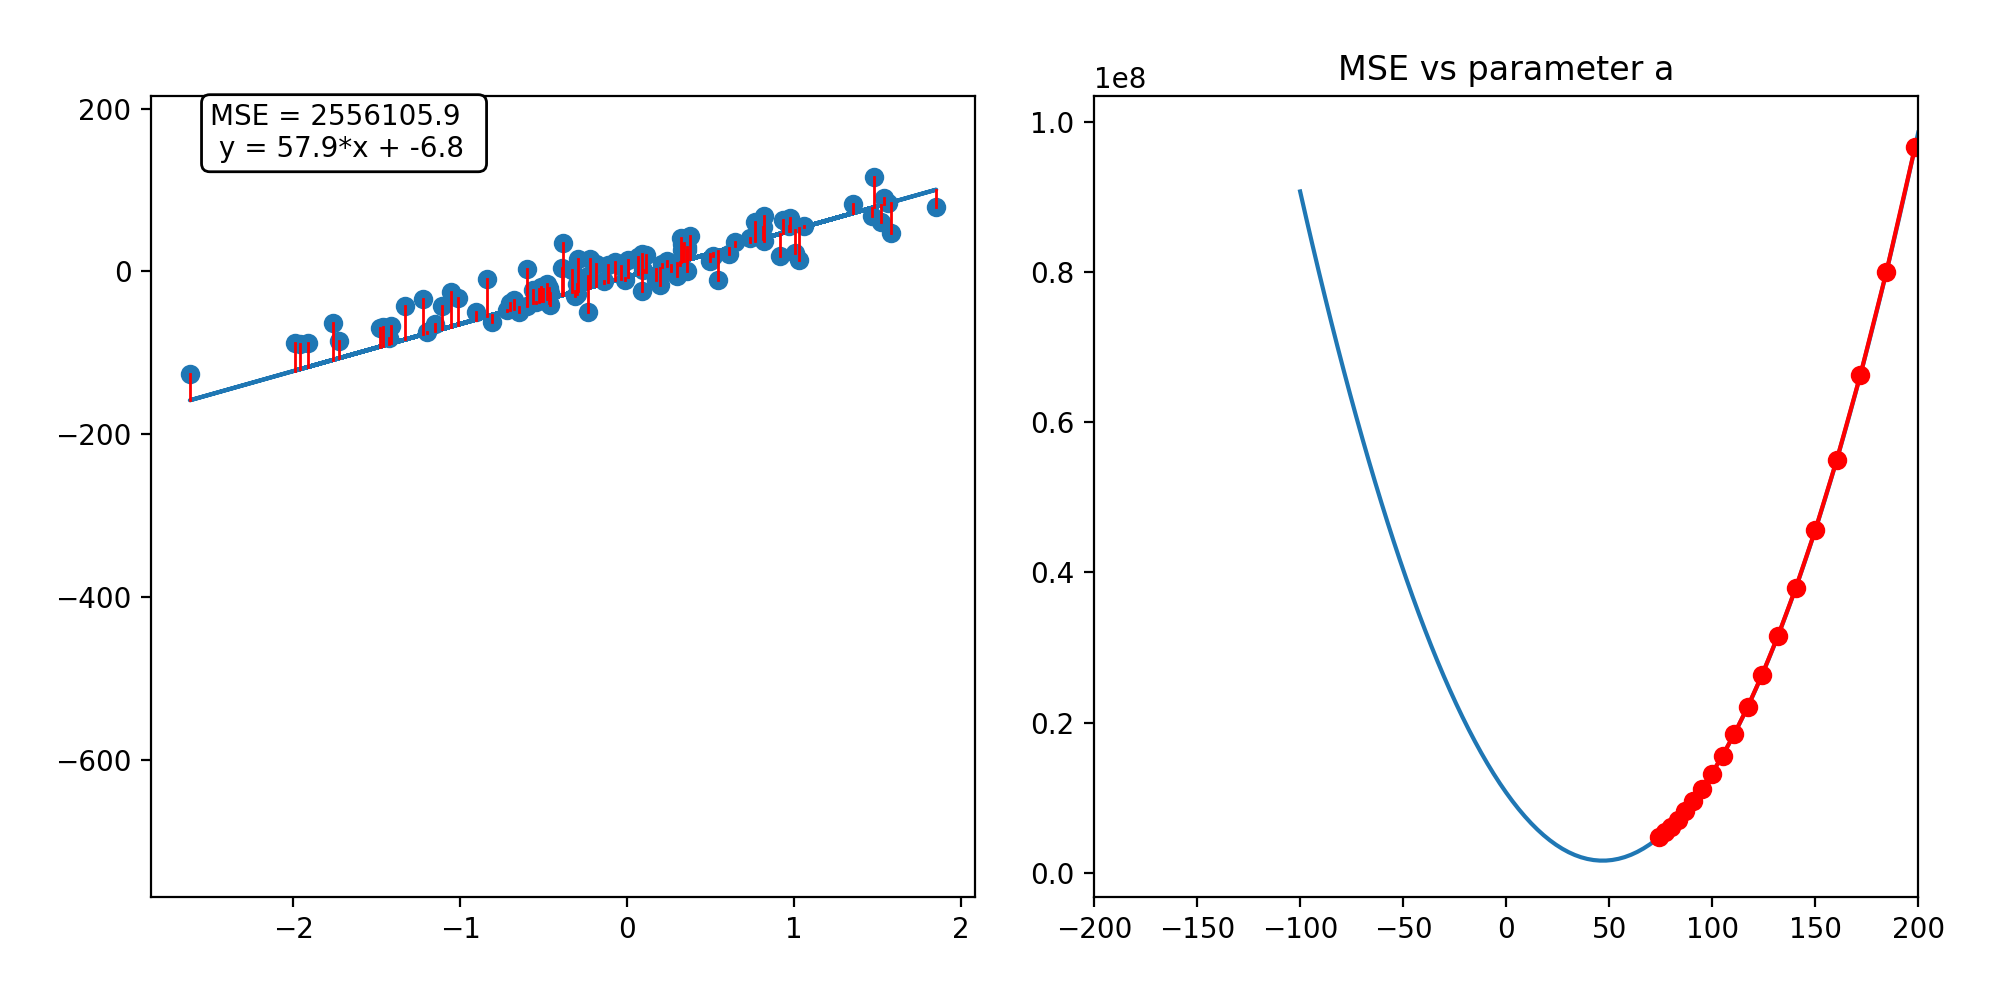

In [20]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)

scatter = ax1.scatter(x,y)
decision_function, = ax1.plot(x,prediction_function(x,200,-200))
lines = [ax1.plot([x[i],x[i]],[prediction_function(x[i],200,-200),y[i]],color="r",linewidth=1) for i in range(0,len(x))]

title = ax1.text(-2.5,140,f'MSE = {z_data[0]:.1f}  \n y = {x_data[0]:.1f}*x + {y_data[0]:.1f}',bbox=dict(boxstyle='round', fc='w'))


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-200,200])
ax2.set_title("MSE vs parameter a")
ax2.plot(alpha_list,loss_2d)
line2, = ax2.plot([],[],color='r',marker="o")


def update_graph(num):
    
    line2.set_data(x_data[0:num],z_data_2d[0:num])
    decision_function.set_data(x,prediction_function(x,x_data[num],y_data[num]))
    
    title.set_text(f'MSE = {z_data[num]:.1f}  \n y = {x_data[num]:.1f}*x + {y_data[num]:.1f}')

    
    for i in range(0,len(x)):
        lines[i][0].set_data([x[i],x[i]],[prediction_function(x[i],x_data[num],y_data[num]),y[i]])
    
    return decision_function,title,lines,line2


line_ani = animation.FuncAnimation(fig, update_graph,
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('gradient_descent_parameter_a.gif', writer="PillowWriter")
#fig.savefig('last_frame.png', writer="PillowWriter")

<IPython.core.display.Javascript object>


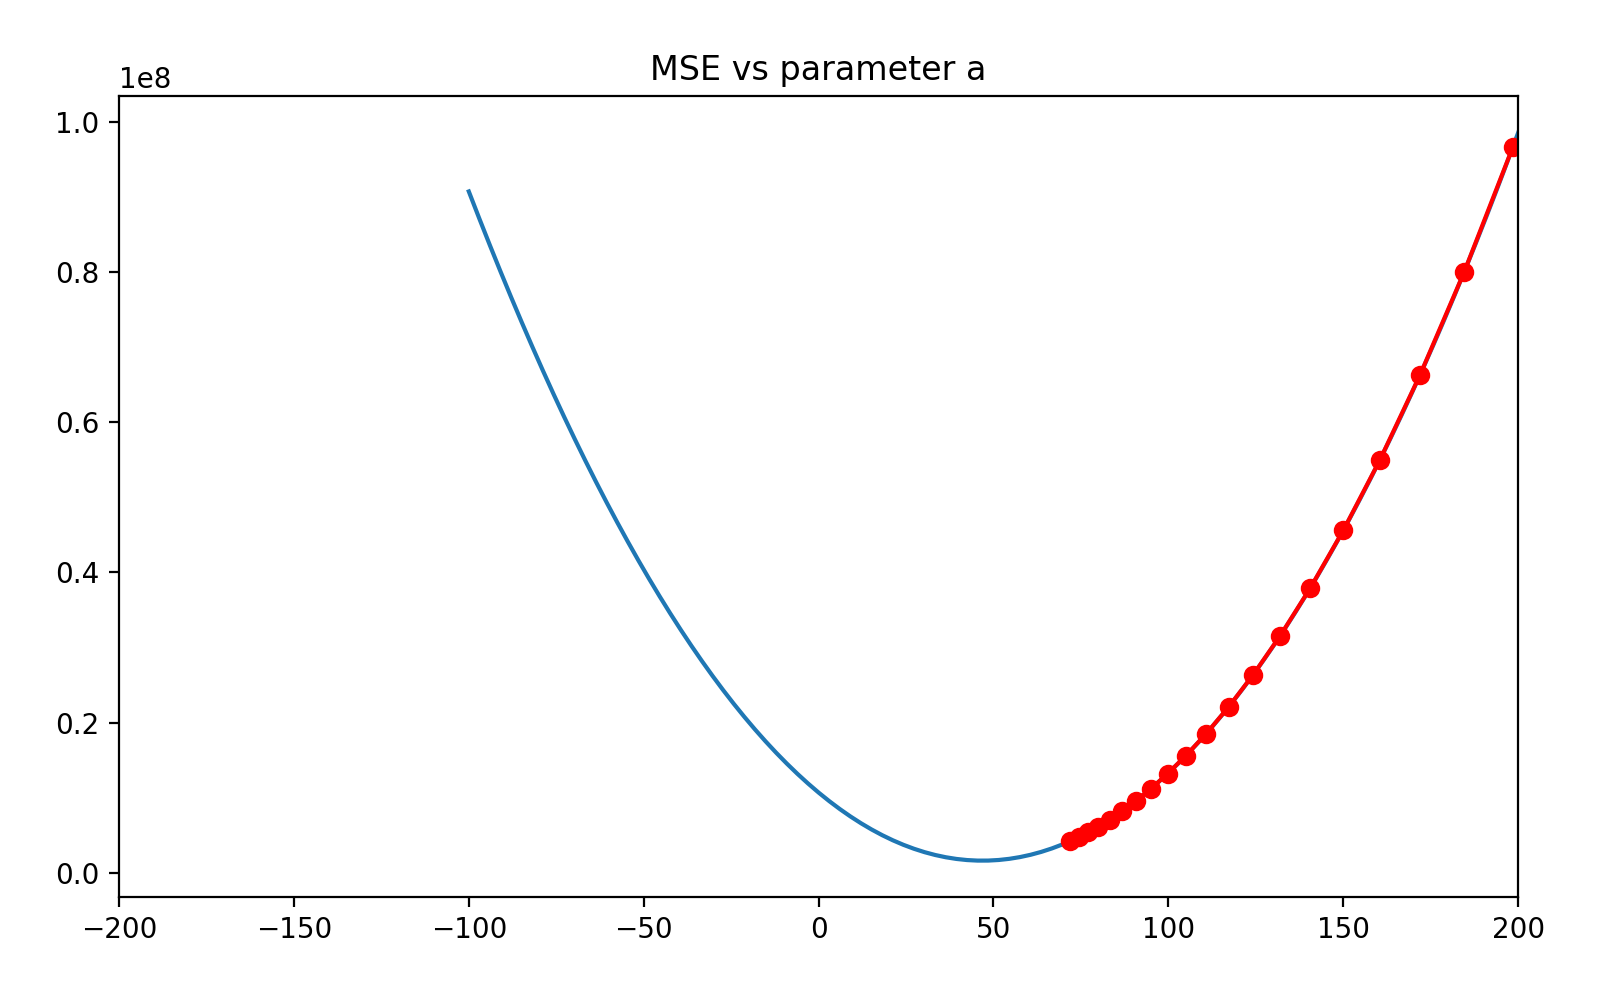

In [22]:
fig = plt.figure(figsize=(8,5))

ax2 = fig.add_subplot(1, 1, 1)
ax2.set_xlim([-200,200])
ax2.set_title("MSE vs parameter a")
ax2.plot(alpha_list,loss_2d)
line2, = ax2.plot([],[],color='r',marker="o")

def update_graph(num):
    
    line2.set_data(x_data[0:num],z_data_2d[0:num])

    return line2


line_ani = animation.FuncAnimation(fig, update_graph,
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('gradient_descent_parameter_a.gif', writer="PillowWriter")
#fig.savefig('gradient_descent_parameter_a.png', writer="PillowWriter")